In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)


In [8]:
df = pd.read_csv('./summ_feed_joined.csv')
df

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,3951A55F8A5682D3,1,1,46,1,0,12,12,0,12,1,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,300.0
1,39898ACF8B8DF7BB,1,2,99,1,0,12,12,0,12,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0
2,7C7CF7C730043552,1,2,34,1,0,3,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0
3,800C1A2D55B31C97,1,2,72,3,0,12,12,0,12,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0
4,804A02EA8F3AEF6B,1,1,49,1,0,12,12,0,12,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,E5753493DCDF3532,0,2,36,2,0,12,12,12,12,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-220.0
804,ED1CC041280181ED,0,1,85,1,0,12,12,0,0,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7966.0
805,EF0E074B9F7625A4,0,1,67,1,0,12,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0
806,F3B93FD9C345F93A,0,2,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# RF FEAT. IMPORTANCE LOWEST PERFORMERS: 
# 28521
# 2809
# bene_smi_cverage_tot_mons
# ben_hi_coverage_tot_mons
# 58881
# Skretia
# Esrd 
# AGE
# DEPRESSN
# CNCR
numerical_columns = [
#  'BENE_AGE',
#  'BENE_HI_CVRAGE_TOT_MONS',
#  'BENE_SMI_CVRAGE_TOT_MONS',
 'BENE_HMO_CVRAGE_TOT_MONS',
 'PLAN_CVRG_MOS_NUM',
 'TOTAL_PAY_AMT']
categorical_columns = ['BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
#  'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
#  'SP_CNCR',
 'SP_COPD',
#  'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
#  'SP_STRKETIA',
#  'ICD_28521',
#  'ICD_58881',
 'ICD_5990',
#  'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651']

In [10]:
# f_cols = list(df.columns)
# f_cols.remove('OPIOID_HARMED')
# f_cols.remove('DESYNPUF_ID')
f_cols = numerical_columns + categorical_columns
X = df[f_cols]
y = df['OPIOID_HARMED']

In [11]:
from collections import Counter
Counter(df.BENE_ESRD_IND)

Counter({0: 689, 1: 119})

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [13]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        # ("classifier", RandomForestClassifier(max_depth= 6, max_features= 8, min_samples_leaf= 6, n_estimators= 120)),
        ("classifier", RandomForestClassifier(max_depth= 6, max_features= 8, min_samples_leaf= 6, n_estimators= 120, oob_score=True)),
    ]
)
dtree = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", DecisionTreeClassifier(max_depth= 6, max_features= 8, min_samples_leaf= 6)),
    ]
)
gbm = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", GradientBoostingClassifier(learning_rate = 0.01, max_depth= 4, n_estimators=200, subsample = 0.5)),
        # 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5
    ]
)

gbm.fit(X_train,y_train)
rf.fit(X_train, y_train)
dtree.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BENE_SEX_IDENT_CD',
                                                   'BENE_RACE_CD',
                                                   'SP_ALZHDMTA', 'SP_CHF',
                                                   'SP_CHRNKIDN', 'SP_COPD',
                                                   'SP_DIABETES', 'SP_ISCHMCHT',
                                                   'SP_OSTEOPRS', 'SP_RA_OA',
                                                   'ICD_5990', 'ICD_3051',
                                                   'ICD_311', 'ICD_5859',
                                                   'ICD_5849', 'ICD_5856',
                                                   'ICD_27651']),
                                                 ('num', SimpleImputer(),
                                                  ['BENE_HMO_CVRAGE_TOT_MONS',
                                                   'PLAN_CVRG_MOS_NUM',
                                                   'TOTAL_PAY_AMT'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, max_features=8,
                                        min_samples_leaf=6))])

In [14]:
from sklearn.metrics import precision_score, recall_score


print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")
for x in [rf,dtree,gbm]:
    print(x['classifier'], '\ntrain accuracy:', x.score(X_train,y_train))
    y_pred = x.predict(X_test)
    print('test accuracy:', x.score(X_test,y_test))
    print('test precision:',precision_score(y_test,y_pred))
    print('test recall:',recall_score(y_test,y_pred))

RF train accuracy: 0.782
RF test accuracy: 0.787
RandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=6,
                       n_estimators=120, oob_score=True) 
train accuracy: 0.7821782178217822
test accuracy: 0.7871287128712872
test precision: 0.8181818181818182
test recall: 0.6847826086956522
DecisionTreeClassifier(max_depth=6, max_features=8, min_samples_leaf=6) 
train accuracy: 0.7574257425742574
test accuracy: 0.7673267326732673
test precision: 0.8169014084507042
test recall: 0.6304347826086957
GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=200,
                           subsample=0.5) 
train accuracy: 0.8085808580858086
test accuracy: 0.7772277227722773
test precision: 0.7901234567901234
test recall: 0.6956521739130435


In [15]:
def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))

0.14169960474308296
receiving operating characteristic auc score: 0.7787549407114626
r2 score: 0.14169960474308296
general accuracy: 0.7871287128712872
confusion matrix:
 [[96 14]
 [29 63]]
precision: 0.8181818181818182 recall: 0.6847826086956522 f1(harmonic mean): 0.7455621301775148


Text(0.5, 1.0, 'ROC curve:\nRandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=6,\n                       n_estimators=120, oob_score=True)')

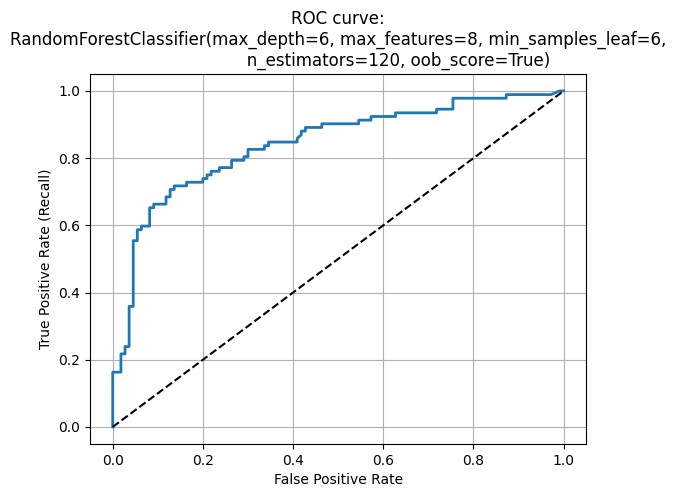

In [16]:
# from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score, brier_score_loss, \
    log_loss, roc_auc_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, median_absolute_error, r2_score
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
y_pred = rf.predict(X_test)
rocauc_temp = roc_auc_score(y_test, y_pred)
r2_temp = r2_score(y_test, y_pred)
print(efron_rsquare(y_test, y_pred))
# score_temp = rf.score(X_test, y_pred)   
score_temp = accuracy_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
# auc_temp = auc(false_positive_rate, true_positive_rate)
# rf.score()
# print('area under the curve:',auc_temp)
print('receiving operating characteristic auc score:',rocauc_temp)
print('r2 score:',r2_temp)
print('general accuracy:', score_temp)

cmatrix_temp = confusion_matrix(y_test, y_pred=y_pred)
print('confusion matrix:\n', cmatrix_temp)
prec_temp = precision_score(y_test, y_pred)
recall_temp = recall_score(y_test, y_pred)
f1_temp = f1_score(y_test, y_pred)
print('precision:',prec_temp, 'recall:',recall_temp, 'f1(harmonic mean):',f1_temp)

plot_roc_curve(false_positive_rate, true_positive_rate, label = str(rf) + ', C-statistics= '+ str(rocauc_temp))
plt.title('ROC curve:\n'+str(rf[1]))

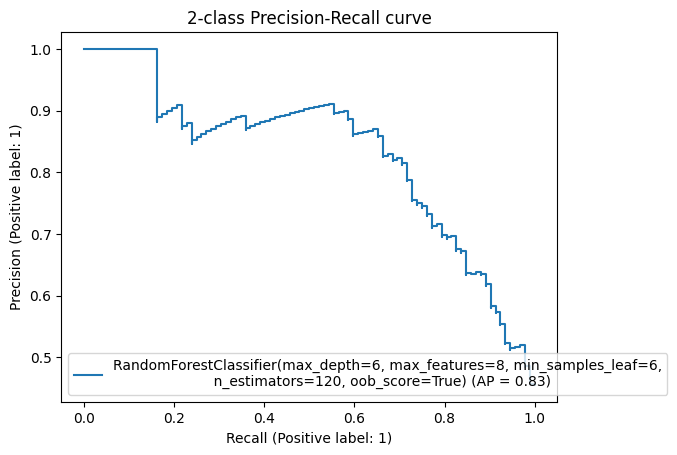

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name=rf[1]
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
# plot_precision_recall_vs_threshold()

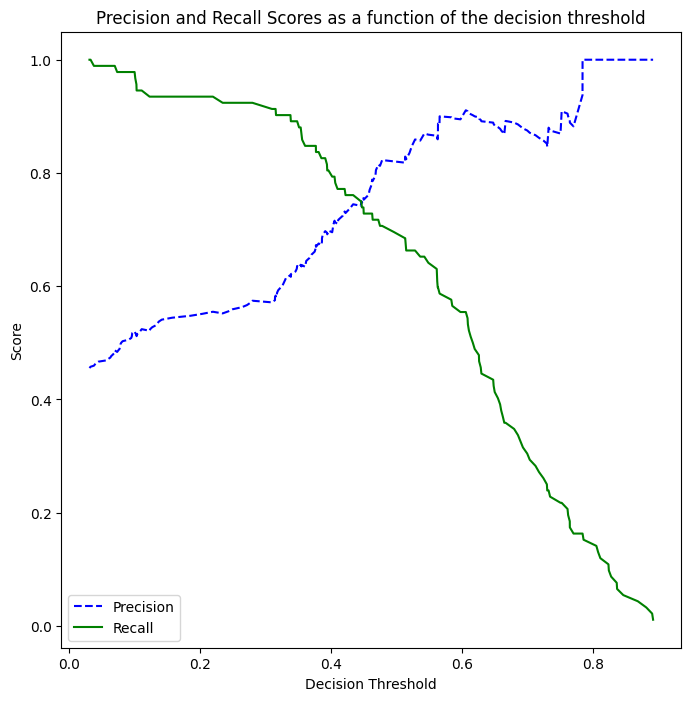

In [19]:
from sklearn.metrics import precision_recall_curve


y_scores = rf.predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
plot_precision_recall_vs_threshold(p, r, thresholds)


In [20]:
# [96 14]
#  [29 63]]
# Precision = tp/(tp+fp)
# recall = tp/(tp+fn)

63/(63+14)
63/(63+29)

0.6847826086956522

In [21]:
import pandas as pd


In [22]:
rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['BENE_SEX_IDENT_CD',
                                                   'BENE_RACE_CD',
                                                   'SP_ALZHDMTA', 'SP_CHF',
                                                   'SP_CHRNKIDN', 'SP_COPD',
                                                   'SP_DIABETES', 'SP_ISCHMCHT',
                                                   'SP_OSTEOPRS', 'SP_RA_OA',
                                                   'ICD_5990', 'ICD_3051',
                                                   'ICD_311', 'ICD_5859',
                                                   'ICD_5849', 'ICD_5856',
                                                   'ICD_27651']),
                                                 ('num', SimpleImputer(),
                                                  ['BENE_HMO_CVRAGE_TOT_MONS',
                                                   'PLAN_CVRG_MOS_NUM',
                                                   'TOTAL_PAY_AMT'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, max_features=8,
                                        min_samples_leaf=6, n_estimators=120,
                                        oob_score=True))])

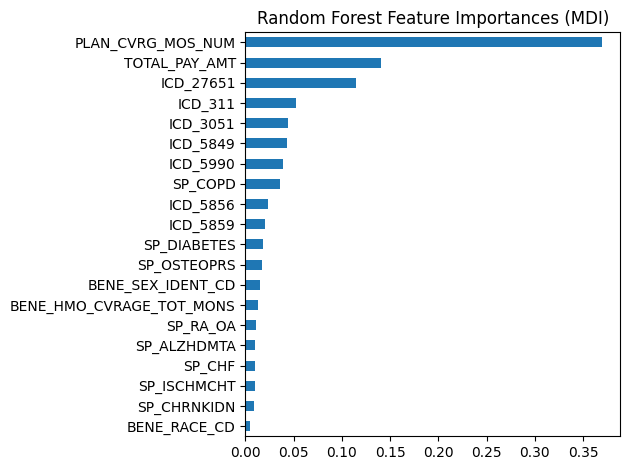

In [23]:
def plot_mdi(clf):
    feature_names = clf[:-1].get_feature_names_out()

    mdi_importances = pd.Series(
        clf[-1].feature_importances_, index=feature_names
    ).sort_values(ascending=True)

    ax = mdi_importances.plot.barh()
    ax.set_title("Random Forest Feature Importances (MDI)")
    ax.figure.tight_layout()

plot_mdi(rf)

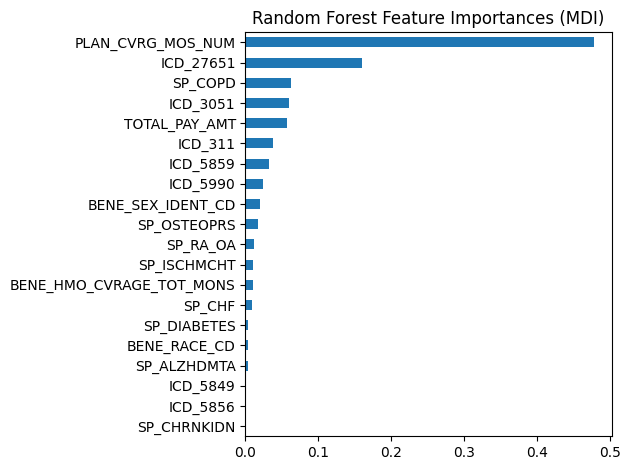

In [24]:
plot_mdi(dtree)

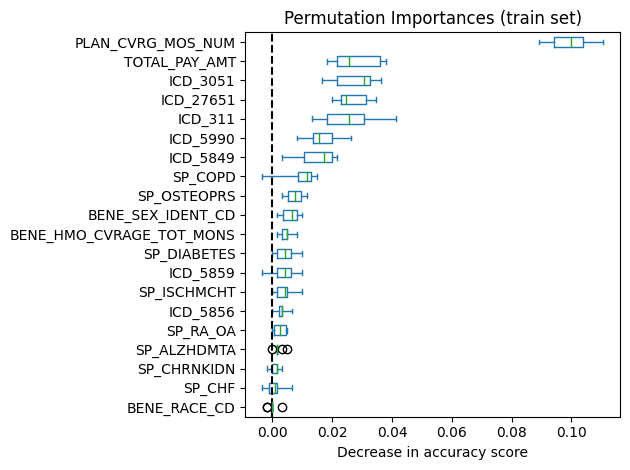

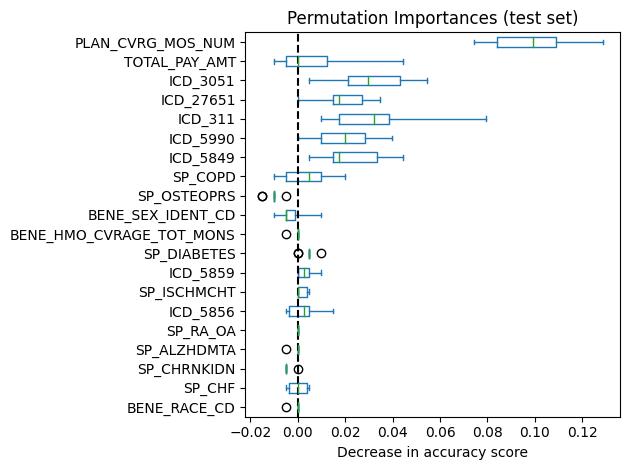

In [25]:
from sklearn.inspection import permutation_importance
def plot_perm(clf):
    train_result = permutation_importance(
        clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
    )
    test_results = permutation_importance(
        clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
    )
    sorted_importances_idx = train_result.importances_mean.argsort()
    train_importances = pd.DataFrame(
        train_result.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    test_importances = pd.DataFrame(
        test_results.importances[sorted_importances_idx].T,
        columns=X.columns[sorted_importances_idx],
    )
    for name, importances in zip(["train", "test"], [train_importances, test_importances]):
        ax = importances.plot.box(vert=False, whis=10)
        ax.set_title(f"Permutation Importances ({name} set)")
        ax.set_xlabel("Decrease in accuracy score")
        ax.axvline(x=0, color="k", linestyle="--")
        ax.figure.tight_layout()
plot_perm(rf)

In [26]:
pd.read_csv('icd9_incidence_differential.csv')

,ICD_CODE,ICD_DESC,HARM_SAMPLE_PCT,RAND_SAMPLE_PCT,RELATIVE_DIFF
0,28521,Anemia in chronic kidney disease,0.009749,0.005639,0.728856
1,496,Chronic obstructive pulmonary disease,0.009184,0.007016,0.308994
2,E9352,NaN,0.008336,0.000066,126.133566
3,58881,Secondary hyperparathyroidism of renal origin,0.007865,0.004000,0.966408
4,5990,Urinary tract infection,0.007441,0.004655,0.598401
5,2809,Iron deficiency anemia,0.007253,0.004196,0.728334
6,41401,Atherosclerotic heart disease of native corona...,0.007206,0.005377,0.340184
7,3051,Nicotine dependence,0.006641,0.004000,0.660261
8,311,Major depressive disorder,0.006123,0.003672,0.667410
9,5859,Chronic kidney disease,0.004804,0.003147,0.526321


In [27]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
# scoring=accuracy
n_estimators = [80,100,120]
max_features = [8,10, 12]
max_depth = [7,16]
min_samples_leaf = [4,5,6]
# scoring: recall
# n_estimators = [80,100,120]
# max_features = [10, 'sqrt']
# max_depth = [25,35]
# min_samples_leaf = [3,4,5]
# min_samples_split = [3, 5, 10]  
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features, max_depth = max_depth, min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [28]:
# optimize for recall:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold


clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [80, 100, 150],
    # 'max_depth': [3, 5, 15, 25],
    'max_depth': [3, 5, 15, 25],
    'max_features': [5,8, 10, 15]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search
# grid_search_clf = grid_search_wrapper(refit_score='recall_score')


In [29]:
# for logistic regression lasso 
from sklearn.linear_model import Lasso, LogisticRegression




In [30]:

lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)
tuned_parameters = [{"alpha": alphas}]
n_folds = 5
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=0),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             refit=False)

In [31]:

scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

(0.0001, 0.31622776601683794)

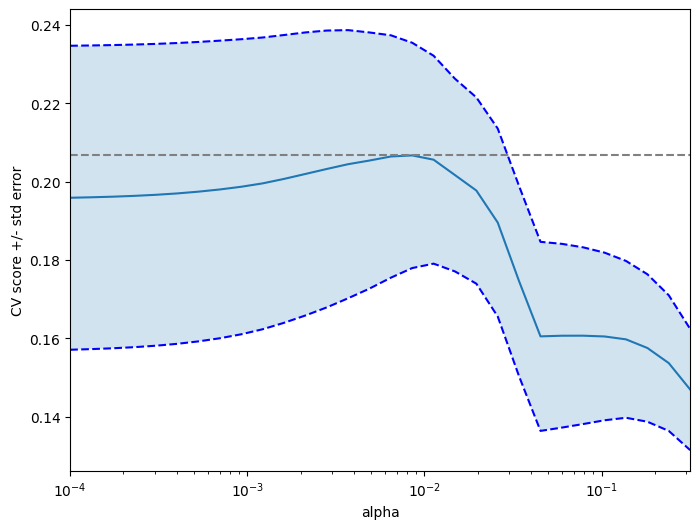

In [32]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

In [33]:
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 0,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}